In [1]:
!git clone https://github.com/zzh8829/yolov3-tf2
%cd yolov3-tf2/
!pip install -r requirements-gpu.txt

Cloning into 'yolov3-tf2'...
remote: Enumerating objects: 419, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 419 (delta 2), reused 0 (delta 0), pack-reused 412
Receiving objects: 100% (419/419), 4.24 MiB | 26.30 MiB/s, done.
Resolving deltas: 100% (239/239), done.
/content/yolov3-tf2
Obtaining file:///content/yolov3-tf2 (from -r requirements-gpu.txt (line 6))
     |████████████████████████████████| 394.5 MB 31 kB/s 
     |████████████████████████████████| 28.7 MB 55 kB/s 
     |████████████████████████████████| 462 kB 62.0 MB/s 
     |████████████████████████████████| 3.8 MB 32.9 MB/s 
     |████████████████████████████████| 2.9 MB 43.8 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd yolov3-tf2/
!ls

import tensorflow as tf
tf.__version__

[Errno 2] No such file or directory: 'yolov3-tf2/'
/content/yolov3-tf2
checkpoints	 data		  README.md		train.py
colab_gpu.ipynb  detect.py	  requirements-gpu.txt	yolov3_tf2
conda-cpu.yml	 detect_video.py  requirements.txt	yolov3_tf2.egg-info
conda-gpu.yml	 docs		  setup.py
convert.py	 LICENSE	  tools


'2.4.2'

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights -O /content/drive/MyDrive/UAV/Model/data/yolov3.weights

--2021-07-29 06:08:11--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/UAV/Model/data/yolov3.weights’

/content/drive/MyDr 100%[===================>] 236.52M  37.6MB/s    in 6.9s    

2021-07-29 06:08:18 (34.4 MB/s) - ‘/content/drive/MyDrive/UAV/Model/data/yolov3.weights’ saved [248007048/248007048]



In [ ]:
!python convert.py --weights /content/drive/MyDrive/UAV/Model/data/yolov3.weights --output /content/drive/MyDrive/UAV/Model/checkpoints/yolov3.tf

2021-07-29 06:08:24.629111: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-07-29 06:08:26.470982: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-07-29 06:08:26.497974: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-07-29 06:08:26.611055: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-29 06:08:26.611126: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (b48d96f0045f): /proc/driver/nvidia/version does not exist
2021-07-29 06:08:26.637825: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in perfo

In [ ]:
pathDataset = "/content/drive/MyDrive/UAV/Model/train_image_folder"
output_path = "/content/drive/MyDrive/UAV/Model/data"
pathCSV = f"{output_path}/images_info.csv"

pathResizeImages = f"{output_path}/images_resize"
pathResizeCSV = f"{output_path}/images_info_resize.csv"


imageTest = "/content/drive/MyDrive/UAV/Model/train_image_folder/000.jpg"
annoYolo = "/content/drive/MyDrive/UAV/Model/yolo_anno"
annoVoc = "/content/drive/MyDrive/UAV/Model/voc_anno"

filenameTrain = f"{output_path}/train_labels.csv"
filenameTest = f"{output_path}/test_labels.csv"

In [ ]:
%%bash
#!/bin/bash

touch /content/drive/MyDrive/UAV/Model/data/uav.names

__usage="person"


echo "$__usage" > /content/drive/MyDrive/UAV/Model/data/uav.names
cd data
cat /content/drive/MyDrive/UAV/Model/data/uav.names

person


In [ ]:
!mkdir /content/drive/MyDrive/UAV/Model/checkpoints

mkdir: cannot create directory ‘/content/drive/MyDrive/UAV/Model/checkpoints’: File exists


In [ ]:
!python train.py \
--dataset /content/drive/MyDrive/UAV/Model/data/train.record \
	--val_dataset /content/drive/MyDrive/UAV/Model/data/test.record \
	--classes /content/drive/MyDrive/UAV/Model/data/uav.names \
	--num_classes 1 \
	--mode fit --transfer darknet \
	--batch_size 8 \
	--epochs 100 \
	--weights /content/drive/MyDrive/UAV/Model/checkpoints/yolov3.tf \
	--weights_num_classes 80 \
  --size 320

2021-07-29 06:09:06.368773: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-07-29 06:09:08.395774: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-07-29 06:09:08.396859: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-07-29 06:09:08.409150: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-29 06:09:08.409214: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (b48d96f0045f): /proc/driver/nvidia/version does not exist
2021-07-29 06:09:08.421247: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in perfo

I0729 09:51:27.229105 139862651049856 <ipython-input-80-03d46151f4d8>:54] classes loaded
I0729 09:51:28.189732 139862651049856 <ipython-input-80-03d46151f4d8>:65] time: 0.9495120048522949
I0729 09:51:28.191490 139862651049856 <ipython-input-80-03d46151f4d8>:67] detections:
I0729 09:51:28.200668 139862651049856 <ipython-input-80-03d46151f4d8>:71] 	person, 0.5724509954452515, [-0.06977125  0.31955916  0.333381    0.5510295 ]
I0729 09:51:28.204920 139862651049856 <ipython-input-80-03d46151f4d8>:71] 	person, 0.516461193561554, [0.45276612 0.24004863 0.46825975 0.2818122 ]
I0729 09:51:28.208708 139862651049856 <ipython-input-80-03d46151f4d8>:71] 	person, 0.5086897015571594, [0.33947718 0.82499033 0.4185416  1.0268112 ]
I0729 09:51:28.213952 139862651049856 <ipython-input-80-03d46151f4d8>:71] 	person, 0.489234983921051, [-0.0568071   0.17601918  0.33786356  0.29239312]
I0729 09:51:28.220319 139862651049856 <ipython-input-80-03d46151f4d8>:71] 	person, 0.4866756200790405, [0.0520978  0.1925222

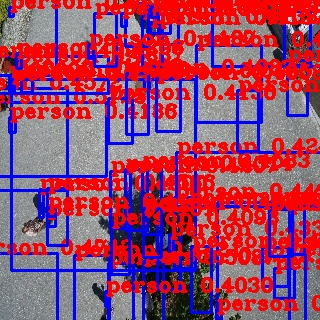

In [ ]:
import sys
from absl import app, logging, flags
from absl.flags import FLAGS
import time
import cv2
import numpy as np
import tensorflow as tf
from yolov3_tf2.models import (
    YoloV3, YoloV3Tiny
)
from yolov3_tf2.dataset import transform_images, load_tfrecord_dataset
from yolov3_tf2.utils import draw_outputs
#flags.DEFINE_string('newclasses', './data/coco.names', 'path to classes file')
#flags.DEFINE_string('weights', './checkpoints/yolov3.tf','path to weights file')
#flags.DEFINE_boolean('tiny', False, 'yolov3 or yolov3-tiny')
#flags.DEFINE_integer('size', 416, 'resize images to')
#flags.DEFINE_string('image', './data/girl.png', 'path to input image')
#flags.DEFINE_string('tfrecord', None, 'tfrecord instead of image')
#flags.DEFINE_string('output', './output.jpg', 'path to output image')
#flags.DEFINE_integer('num_classes', 80, 'number of classes in the model')

app._run_init(['yolov3'], app.parse_flags_with_usage)

physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
  try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
  except RuntimeError:
    pass

FLAGS.classes = '/content/drive/MyDrive/UAV/Model/data/uav.names'
FLAGS.weights = '/content/drive/MyDrive/UAV/Model/checkpoints/yolov3.tf'
FLAGS.image = '/content/drive/MyDrive/UAV/Model/data/images_resize/000.jpg'
FLAGS.num_classes = 1
FLAGS.size = 320

# Lower threshold due to insufficient training
#FLAGS.yolo_iou_threshold = 0.2
#FLAGS.yolo_score_threshold = 0.2

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)

if FLAGS.weights:
  try:
    yolo.load_weights(FLAGS.weights).expect_partial()
    logging.info('weights loaded')
  except ValueError:
    pass

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

img_raw = tf.image.decode_image(
    open(FLAGS.image, 'rb').read(), channels=3)

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
logging.info('time: {}'.format(t2 - t1))

logging.info('detections:')
for i in range(nums[0]):
    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))

img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)
img = draw_outputs(img, (boxes, scores, classes, nums), class_names)

from IPython.display import Image, display
display(Image(data=bytes(cv2.imencode('.jpg', img)[1])))